## LDA

In [1]:
import os
import pandas as pd
import numpy as np

In [4]:
df_attrition = pd.read_csv('HR-Employee-Attrition.csv')
df_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df_attrition.head(2).T

,0,1
Age,41,49
Attrition,Yes,No
BusinessTravel,Travel_Rarely,Travel_Frequently
DailyRate,1102,279
Department,Sales,Research & Development
DistanceFromHome,1,8
Education,2,1
EducationField,Life Sciences,Life Sciences
EmployeeCount,1,1
EmployeeNumber,1,2


In [6]:
df_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df_attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df_attrition.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df_attrition.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

### find the relationship between job satisfaction and attrition

ValueError: Cannot use `hue` without `x` and `y`

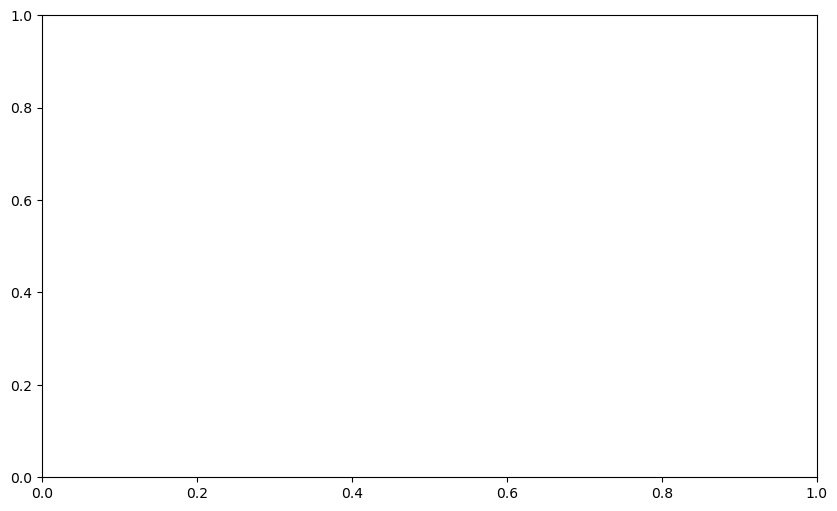

In [22]:
plt.subplots(figsize= (10,6))
sns.countplot(df_attrition['JobSatisfaction'], hue=df_attrition['Attrition'])
plt.show()

### Find the relationship between `salary hike and attrition`

In [25]:
df_attrition.groupby('Attrition')['PercentSalaryHike'].mean().reset_index()

,Attrition,PercentSalaryHike
0,No,15.231144
1,Yes,15.097046


In [26]:
df_attrition.groupby('Attrition')['PercentSalaryHike'].median().reset_index()

,Attrition,PercentSalaryHike
0,No,14.0
1,Yes,14.0


### Let us plot a box plot

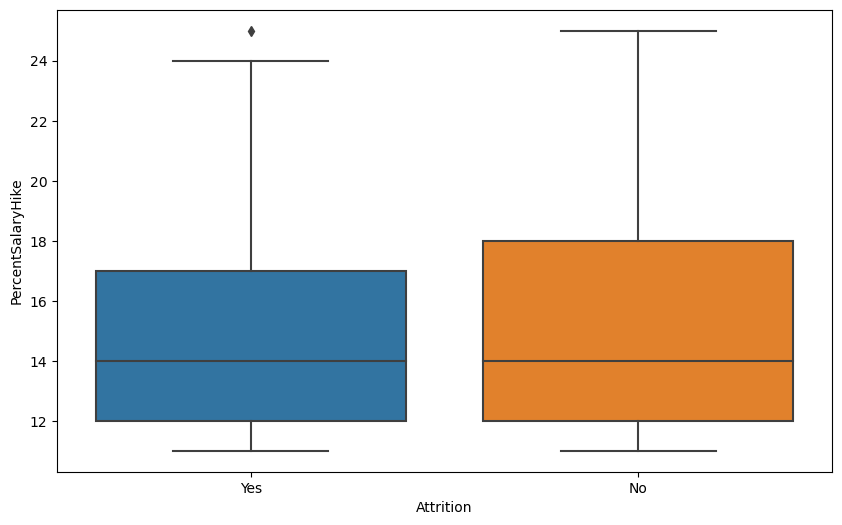

In [24]:
plt.subplots(figsize= (10,6))
sns.boxplot(x=df_attrition['Attrition'], y=df_attrition['PercentSalaryHike'])
plt.show()

### Find the relationship between `YearsSinceLastPromotion and attrition`

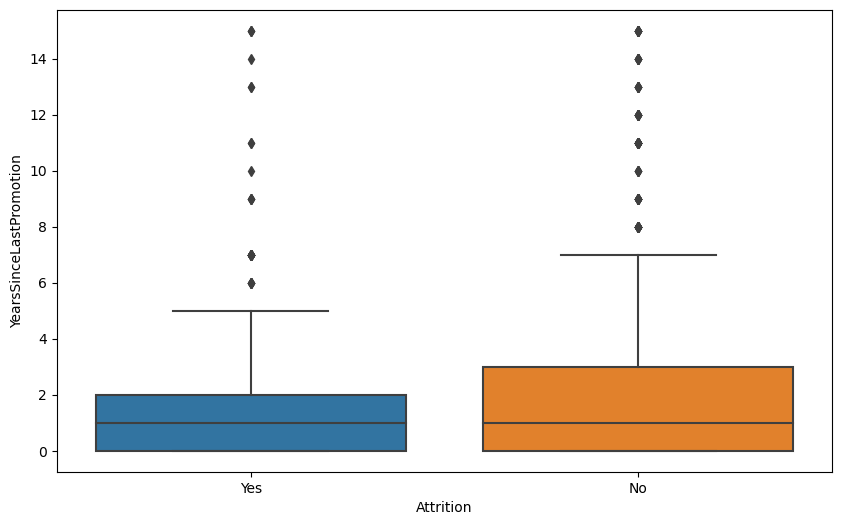

In [27]:
plt.subplots(figsize= (10,6))
sns.boxplot(x=df_attrition['Attrition'], y=df_attrition['YearsSinceLastPromotion'])
plt.show()

In [28]:
df_sub_attr_yes = df_attrition[df_attrition['Attrition']=="Yes"]
df_sub_attr_yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [29]:
df_sub_attr_yes['YearsSinceLastPromotion'].describe()

count    237.000000
mean       1.945148
std        3.153077
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [32]:
df_sub_attr_no = df_attrition[df_attrition['Attrition']=="No"]
df_sub_attr_no

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [33]:
df_sub_attr_no['YearsSinceLastPromotion'].describe()

count    1233.000000
mean        2.234388
std         3.234762
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [34]:
sel_cols = ['Age', 'Attrition','DistanceFromHome','Gender','JobSatisfaction','MaritalStatus','MonthlyIncome','WorkLifeBalance','PercentSalaryHike', 'PerformanceRating','YearsSinceLastPromotion','YearsAtCompany']

In [35]:
df_attrition[sel_cols]

,Age,Attrition,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,WorkLifeBalance,PercentSalaryHike,PerformanceRating,YearsSinceLastPromotion,YearsAtCompany
0,41,Yes,1,Female,4,Single,5993,1,11,3,0,6
1,49,No,8,Male,2,Married,5130,3,23,4,1,10
2,37,Yes,2,Male,3,Single,2090,3,15,3,0,0
3,33,No,3,Female,3,Married,2909,3,11,3,3,8
4,27,No,2,Male,2,Married,3468,3,12,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,23,Male,4,Married,2571,3,17,3,0,5
1466,39,No,6,Male,1,Married,9991,3,15,3,1,7
1467,27,No,4,Male,2,Married,6142,3,20,4,0,6
1468,49,No,2,Male,2,Married,5390,2,14,3,0,9


In [36]:
df_attrition[sel_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   DistanceFromHome         1470 non-null   int64 
 3   Gender                   1470 non-null   object
 4   JobSatisfaction          1470 non-null   int64 
 5   MaritalStatus            1470 non-null   object
 6   MonthlyIncome            1470 non-null   int64 
 7   WorkLifeBalance          1470 non-null   int64 
 8   PercentSalaryHike        1470 non-null   int64 
 9   PerformanceRating        1470 non-null   int64 
 10  YearsSinceLastPromotion  1470 non-null   int64 
 11  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 137.9+ KB


### Encoding Categorical Variables

In [37]:
from sklearn.preprocessing import LabelEncoder #1-hot encoder (Categorical --> Binary Hot Encoding)
from sklearn.model_selection import train_test_split #train_test split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score #Crossvalidation

In [40]:
def create_encoding(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    df=pd.concat([df, dummies], axis=1)
    return df

In [41]:
df_attrition_final = df_attrition[sel_cols]

In [42]:
for col in ['Gender','MaritalStatus']:
    df_attrition_final = create_encoding(df_attrition_final, col)

In [43]:
df_attrition_final.sample(2).T

,874,970
Age,30,27
Attrition,No,No
DistanceFromHome,7,11
Gender,Male,Female
JobSatisfaction,3,4
MaritalStatus,Divorced,Married
MonthlyIncome,3491,2534
WorkLifeBalance,2,3
PercentSalaryHike,13,14
PerformanceRating,3,3


In [44]:
df_attrition_final.drop(['Gender','MaritalStatus'], axis=1, inplace=True)

In [45]:
df_attrition_final['Attrition']= df_attrition_final['Attrition'].map({'Yes': 1, 'No': 0})

In [47]:
df_attrition_final.sample(2)

,Age,Attrition,DistanceFromHome,JobSatisfaction,MonthlyIncome,WorkLifeBalance,PercentSalaryHike,PerformanceRating,YearsSinceLastPromotion,YearsAtCompany,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
427,60,0,28,1,10266,4,19,3,13,18,1,0,0,1,0
1297,26,1,20,2,2148,3,11,3,1,5,1,0,0,1,0


In [48]:
df_attrition_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int64
 2   DistanceFromHome         1470 non-null   int64
 3   JobSatisfaction          1470 non-null   int64
 4   MonthlyIncome            1470 non-null   int64
 5   WorkLifeBalance          1470 non-null   int64
 6   PercentSalaryHike        1470 non-null   int64
 7   PerformanceRating        1470 non-null   int64
 8   YearsSinceLastPromotion  1470 non-null   int64
 9   YearsAtCompany           1470 non-null   int64
 10  Gender_Female            1470 non-null   uint8
 11  Gender_Male              1470 non-null   uint8
 12  MaritalStatus_Divorced   1470 non-null   uint8
 13  MaritalStatus_Married    1470 non-null   uint8
 14  MaritalStatus_Single     1470 non-null   uint8
dtypes: i

### Create train and validation sets

In [49]:
df_attrition_final.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'JobSatisfaction',
       'MonthlyIncome', 'WorkLifeBalance', 'PercentSalaryHike',
       'PerformanceRating', 'YearsSinceLastPromotion', 'YearsAtCompany',
       'Gender_Female', 'Gender_Male', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [50]:
input_vars= ['Age', 'DistanceFromHome', 'JobSatisfaction',
       'MonthlyIncome', 'WorkLifeBalance', 'PercentSalaryHike',
       'PerformanceRating', 'YearsSinceLastPromotion', 'Gender_Female',
       'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single']

In [51]:
X=df_attrition_final[input_vars] #just have the input variables

In [52]:
y=df_attrition_final['Attrition'] # have the target variable

In [53]:
df_attrition.shape, df_attrition_final.shape

((1470, 35), (1470, 15))

In [54]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.3, random_state=20)

In [55]:
train_X.shape

(1029, 13)

In [56]:
val_X.shape

(441, 13)

### Fit the model on the training data

In [61]:
lda_clf = LinearDiscriminantAnalysis()

In [62]:
lda_clf.fit(train_X, train_y) #training the model

LinearDiscriminantAnalysis()

### Predict the validation set

In [63]:
pred_values = lda_clf.predict(val_X) #predicting the validation set with the trained model

### Calculate performance metrics of the model 

In [65]:
acc =accuracy_score(val_y,pred_values) #val_y:actual and pred_values: predicted
print('Accuracy of the model is:', acc*100)

Accuracy of the model is: 84.35374149659864


### Plot the confusion matrix using heatmap

In [66]:
cm = confusion_matrix(val_y, pred_values) 

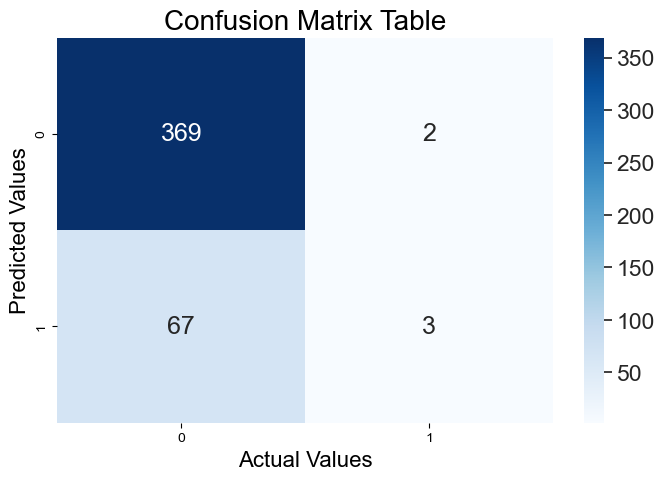

In [67]:
plt.subplots(figsize=(8,5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Table', fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

### Calculate Precision

In [68]:
prec = precision_score(val_y, pred_values)
print("Precision for the model is:", prec*100)

Precision for the model is: 60.0


### Plot the ROC curve

In [70]:
fpr, tpr, thresholds = roc_curve(val_y, pred_values)

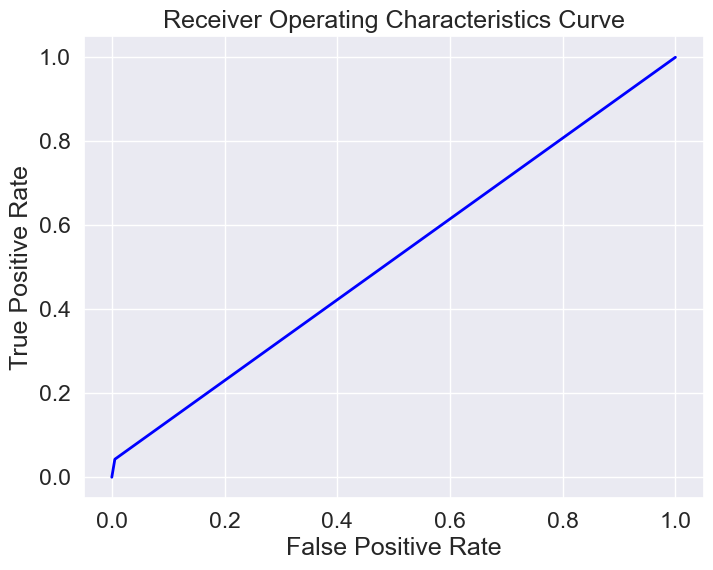

In [71]:
### Plotting the ROC curve
plt.subplots(figsize=(8,6))

plt.plot(fpr, tpr, color='blue', lw=2,label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.show()